In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, [2, 3]]
y = iris.target

In [4]:
from collections import Counter

In [5]:
Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [6]:
np.unique(y)

array([0, 1, 2])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1,
                                                    stratify=y)

In [8]:
np.bincount(y_train)

array([35, 35, 35], dtype=int64)

In [9]:
Counter(y_train)

Counter({0: 35, 2: 35, 1: 35})

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [12]:
y_pred = ppn.predict(X_test_std)

In [13]:
print('false count: ', sum(y_pred != y_test))

false count:  1


In [14]:
ppn.score(X_test_std, y_test)

0.9777777777777777

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9777777777777777

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, random_state=1)

In [17]:
lr.score(X_test_std, y_test)

0.9777777777777777

In [18]:
X_test_std[:3]

array([[ 0.89820289,  1.44587881],
       [-1.16537974, -1.04507821],
       [-1.33269725, -1.17618121]])

In [19]:
lr.predict_proba(X_test_std[:3])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [20]:
lr.predict_proba(X_test_std[:3]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [21]:
lr.predict(X_test_std[:3])

array([2, 0, 0])

In [22]:
X_test_std[0]

array([0.89820289, 1.44587881])

In [23]:
lr.predict(X_test_std[0].reshape(1, -1))

array([2])

In [24]:
lr.coef_

array([[-6.93265988, -5.76495748],
       [-2.03192177, -0.03413691],
       [ 8.96458165,  5.79909439]])

# SVM (метод опорных векторов)

In [25]:
from sklearn.svm import SVC # svm с мягким зазором

In [26]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [27]:
svm.score(X_test_std, y_test)

0.9777777777777777

In [28]:
svm.coef_

array([[-1.28108835, -1.08908074],
       [-0.68216416, -0.56900015],
       [-2.20580665, -1.9370517 ]])

## kernel methods for non-linear

In [29]:
import matplotlib.pyplot as plt

np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

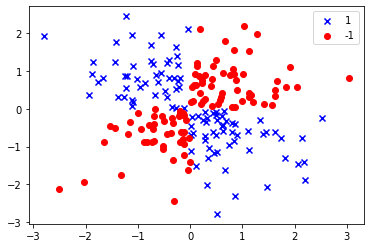

In [30]:
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')

plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r', marker='o',
            label='-1')
plt.legend(loc='best')
plt.show()

In [31]:
from matplotlib.colors import ListedColormap


def plot_decision_regions1(X, y, classifier, test_idx=None, resolution=0.02):
    # настроить генератор маркеров и карту цветов
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # вывести поверхность решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, хх2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), хх2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, хх2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(хх2.min(), хх2.max())
    # вывести образцы по классам
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

In [32]:
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10).fit(
    X_xor, y_xor)
svm_l = SVC(kernel='linear', random_state=1, C=10).fit(
    X_xor, y_xor)

C:\Users\zekat\AppData\Local\Temp/ipykernel_9656/952118900.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


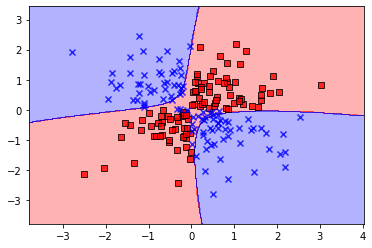

In [40]:
plot_decision_regions1(X_xor, y_xor, svm_rbf)

C:\Users\zekat\AppData\Local\Temp/ipykernel_9656/952118900.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


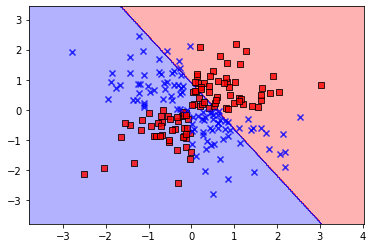

In [41]:
plot_decision_regions1(X_xor, y_xor, svm_l)

<AxesSubplot:>

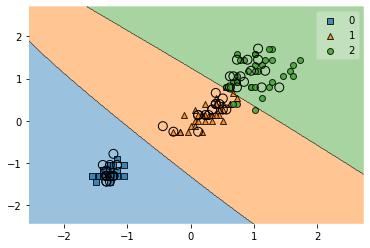

In [43]:
from mlxtend.plotting import plot_decision_regions
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=1).fit(
    X_train_std, y_train)
plot_decision_regions(X_train_std, y_train, svm, X_highlight=X_test_std)

<AxesSubplot:>

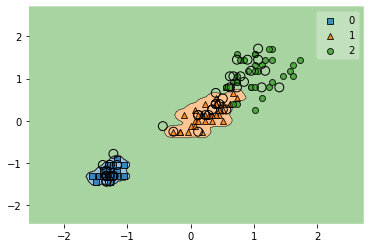

In [59]:
svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1).fit(
    X_train_std, y_train)
plot_decision_regions(X_train_std, y_train, svm, X_highlight=X_test_std)

In [44]:
svm.score(X_test_std, y_test)

0.9777777777777777

# Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4,
                                    random_state=1)

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

<AxesSubplot:>

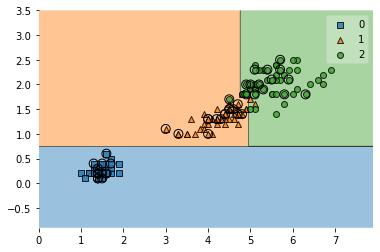

In [62]:
X_comb = np.vstack((X_train, X_test))
y_comb = np.hstack((y_train, y_test))
plot_decision_regions(X_comb, y_comb, tree_model, X_highlight=X_test)

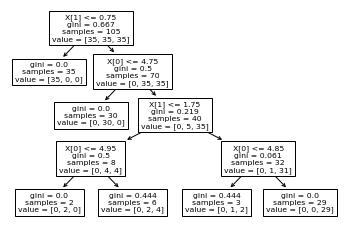

In [63]:
from sklearn import tree

tree.plot_tree(tree_model)
plt.show()

<AxesSubplot:>

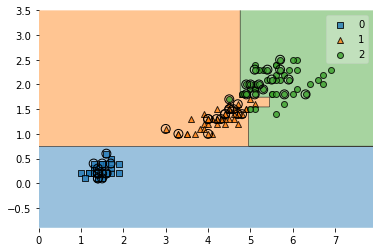

In [64]:
tree_model2 = DecisionTreeClassifier(criterion='gini',
                                     random_state=1)

tree_model2.fit(X_train, y_train)
plot_decision_regions(X_comb, y_comb, tree_model2, X_highlight=X_test)

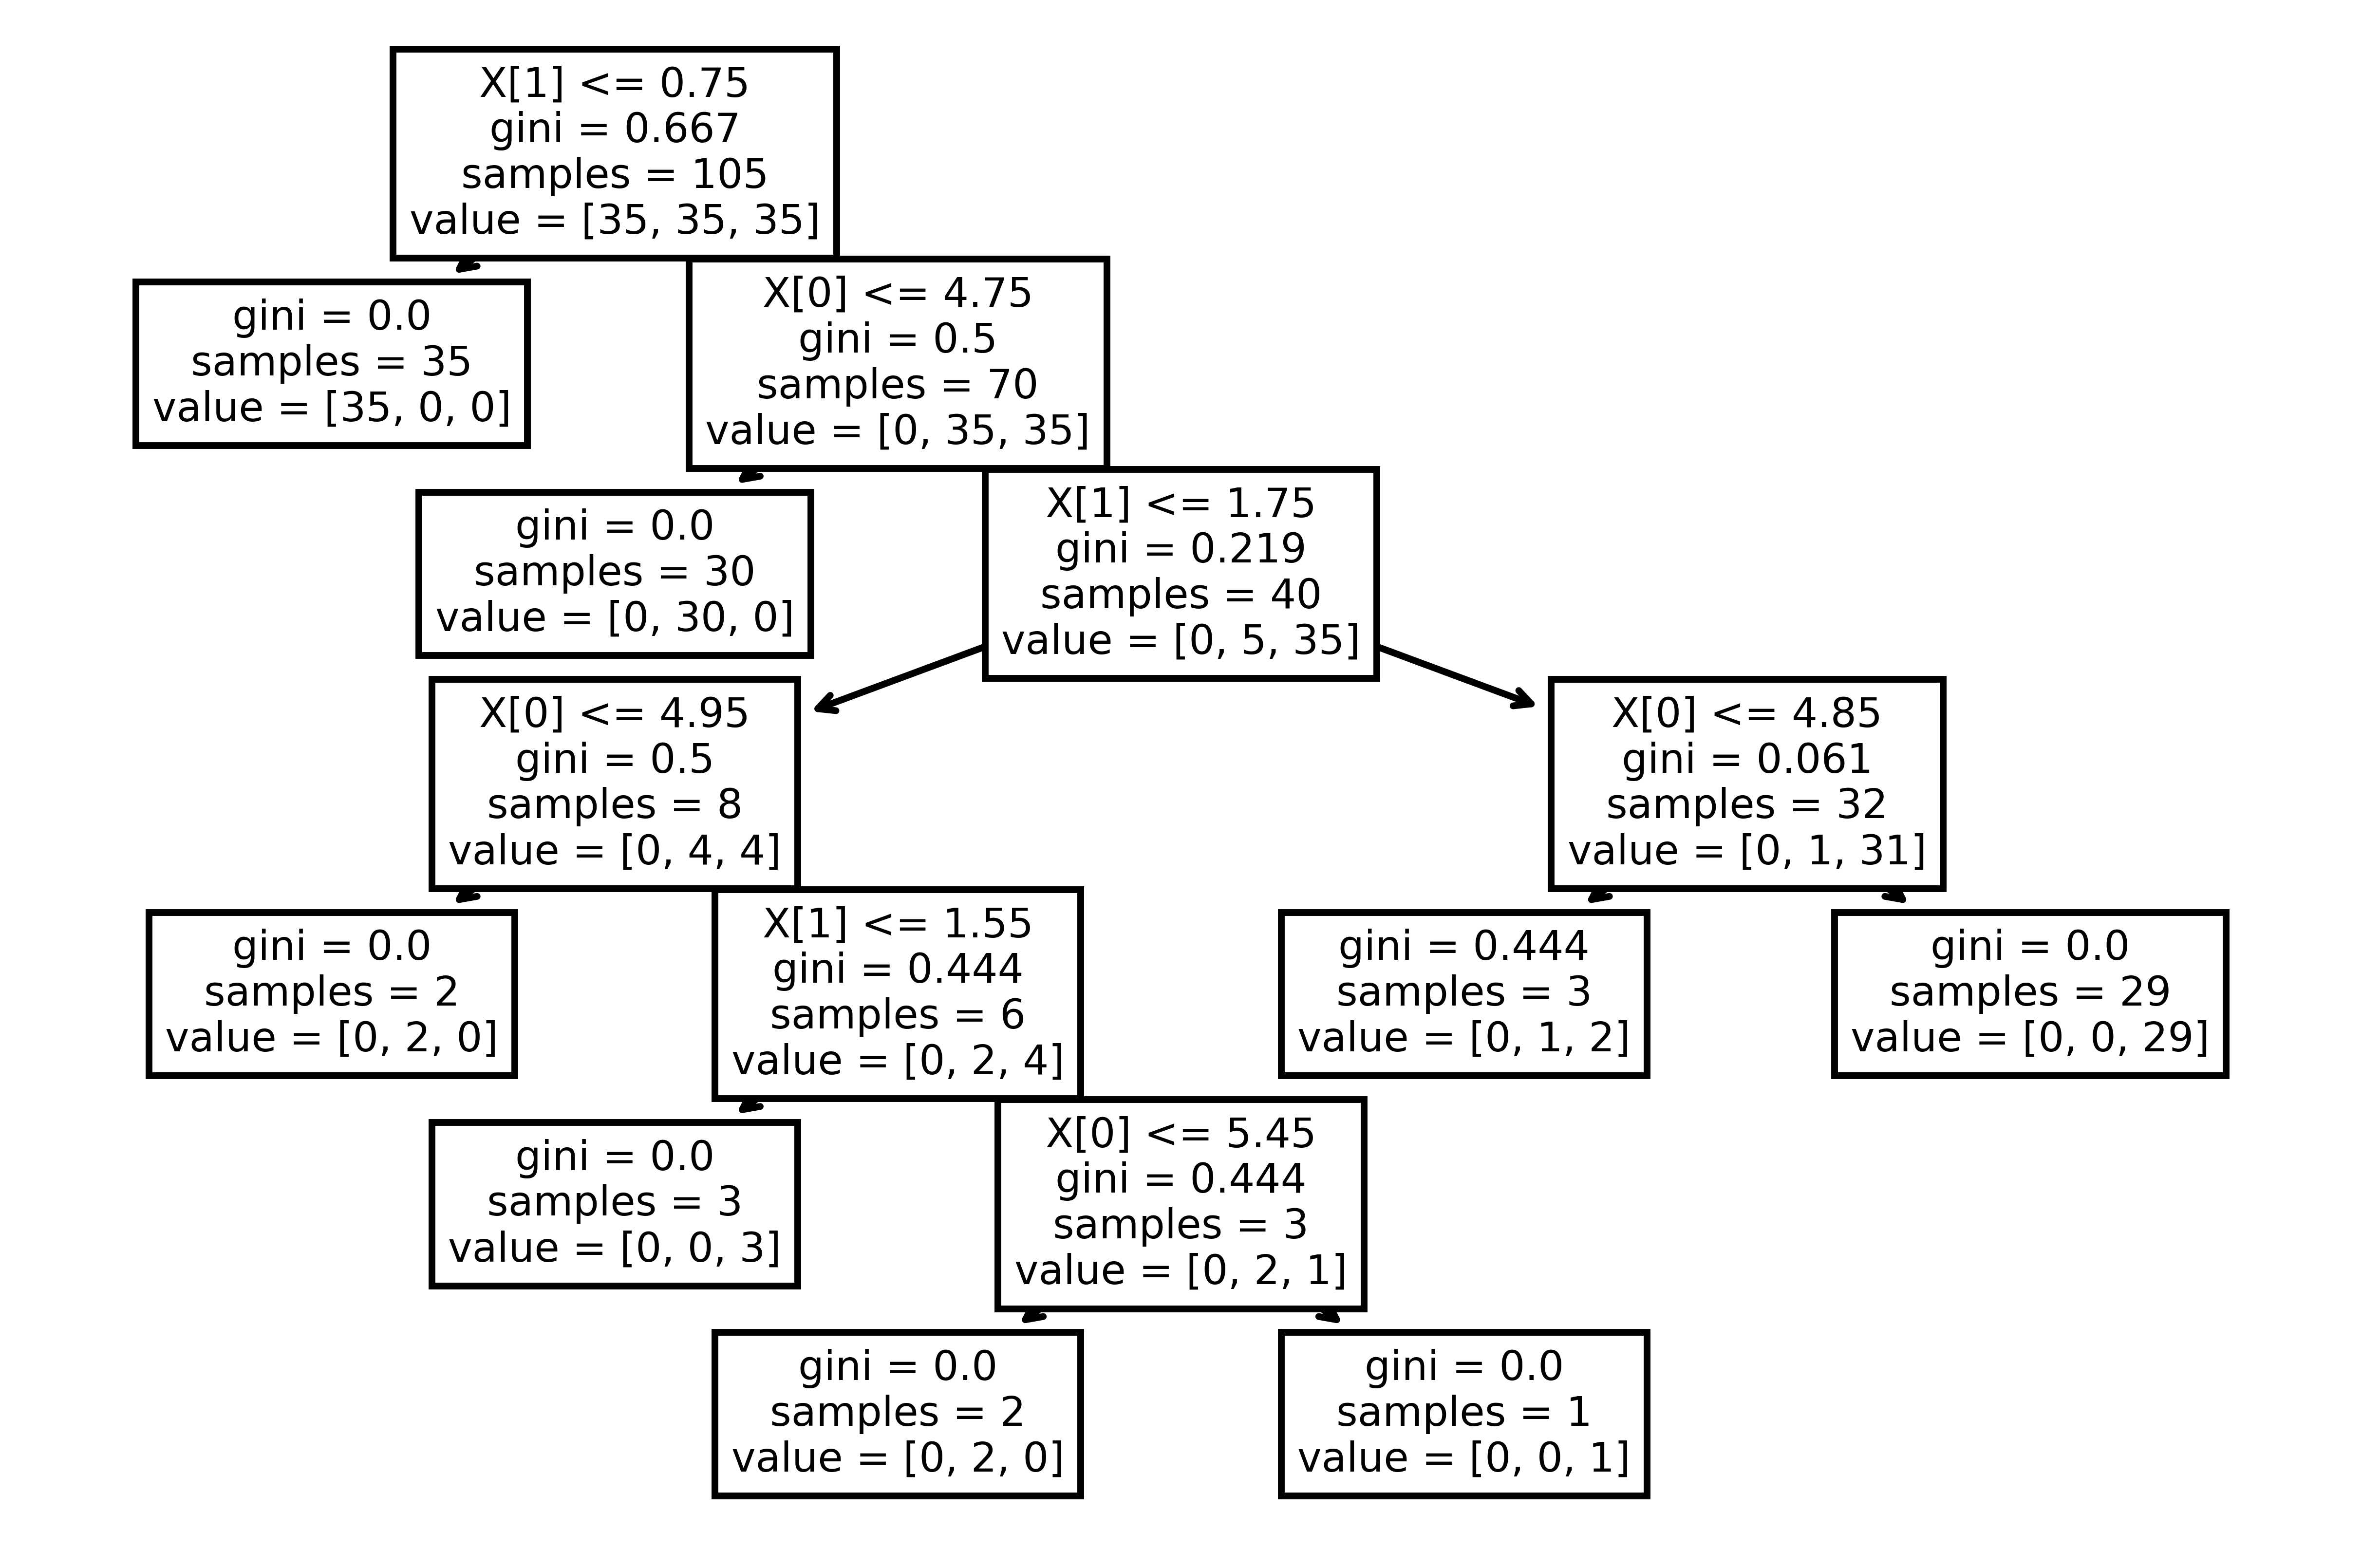

In [76]:
plt.figure(dpi=1000)
tree.plot_tree(tree_model2)
plt.show()

<AxesSubplot:>

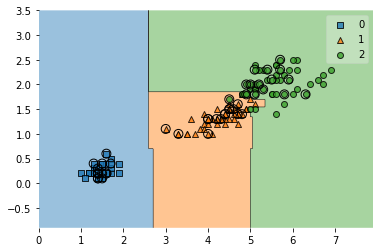

In [77]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25, criterion='gini',
                                random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_comb, y_comb, forest, X_highlight=X_test)

# KNN

<AxesSubplot:>

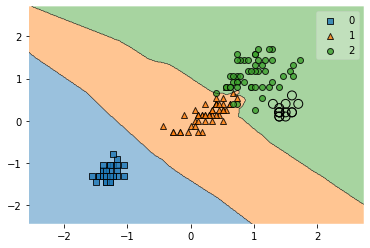

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
knn.fit(X_train_std, y_train)
X_comb_std = np.vstack((X_train_std, X_test_std))
plot_decision_regions(X_comb_std, y_comb, knn, X_highlight=X_test)

In [ ]:
стр 146